**Import required libraries**

In [1]:
import intake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime
import numpy as np

**Open the NWM intake catalog**

In [2]:
catalog = intake.open_catalog('s3://nextgen-dmac-cloud-ingest/nwm_ll/nwm_intake.yml',storage_options={'anon':True})
(list(catalog))

['NWM_Best_CONUS_Short_Range',
 'NWM_Best_CONUS_Medium_Range',
 'NWM_Best_Alaska_Short_Range',
 'NWM_Best_Alaska_Medium_Range',
 'NWM_Best_Hawaii_Short_Range',
 'NWM_Best_PuertoRico_Short_Range']

### Compare NWM netCDF source files with Kerchunked virtual 'best timeseries' aggregations

Part of the processing included adding additional coordinate and attribute values to the souce netCDF files produced by NWM.  Below is a list of the additions.  The following cells open example .nc files for each forecast type, and then the equivalent Kerchunk aggregation from the Intake catalog.


**Coordinates** added to the kerchunked datasets include: 
* latitude
* longitude

**Variables** added include:
* altitude: altitude of node 
* link_id: the link id of the node
* from_link_id: the from_link_id of the node in the network topology
* to_link_id: the to_link_id of the node in the network topology
* terminal_node: whether this node is a terminal node or not


**Dimensions**
Other changes include to the length of the `time` dimension in the dataset, which is increased to the # of forecast steps in the best timeseries aggregations, and the data variables all vary on (time, featureid) rather than only featureid as in the source forecast files.


In [3]:
## open short range dataset:
import xarray as xr

ds_sr_nc = xr.open_dataset("files/nwm.t23z.short_range.channel_rt.f001.conus.nc")
ds_sr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-14
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T23:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_23:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-14_00:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [4]:
cat = catalog['NWM_Best_CONUS_Short_Range']
ds_sr = cat.to_dask()
ds_sr

<xarray.Dataset> Size: 92GB
Dimensions:         (feature_id: 2776734, time: 688, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-05-07T17:00:00
  * time            (time) datetime64[ns] 6kB 2024-05-07T18:00:00 ... 2024-06...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 15GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-05-07_18:00:00
    model_total_valid_times:    18
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [5]:
# medium range conus:
ds_mr_nc = xr.open_dataset("files/nwm.t18z.medium_range_blend.channel_rt.f001.conus.nc")
ds_mr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-13T19:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T18:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_18:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-13_19:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend

In [6]:
cat = catalog['NWM_Best_CONUS_Medium_Range']
ds_mr = cat.to_dask()
ds_mr

<xarray.Dataset> Size: 121GB
Dimensions:         (feature_id: 2776734, time: 906, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-05-07T12:00:00
  * time            (time) datetime64[ns] 7kB 2024-05-07T13:00:00 ... 2024-06...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 20GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-05-07_13:00:00
    model_total_valid_times:    240
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [7]:
# short range alaska:
ds_ak_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f001.alaska.nc")
ds_ak_sr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [8]:
cat = catalog['NWM_Best_Alaska_Short_Range']
ds_ak_sr = cat.to_dask()
ds_ak_sr

<xarray.Dataset> Size: 13GB
Dimensions:         (feature_id: 391528, time: 717, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-05-07T15:00:00
  * time            (time) datetime64[ns] 6kB 2024-05-07T16:00:00 ... 2024-06...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-05-07_16:00:00
    model_total_valid_times:    45
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [9]:
# short range alaska:
ds_ak_mr_nc = xr.open_dataset("files/nwm.t00z.medium_range_blend.channel_rt.f001.alaska.nc")
ds_ak_mr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend_alaska

In [10]:
cat = catalog['NWM_Best_Alaska_Medium_Range']
ds_ak_mr = cat.to_dask()
ds_ak_mr

<xarray.Dataset> Size: 17GB
Dimensions:         (feature_id: 391528, time: 907, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-05-07T12:00:00
  * time            (time) datetime64[ns] 7kB 2024-05-07T18:00:00 ... 2024-06...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 7kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-05-07_18:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [11]:
# short range alaska:
ds_hi_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f00015.hawaii.nc")
ds_hi_sr_nc

<xarray.Dataset> Size: 764kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 13637)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T00:15:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 109kB 800000002 800000003 ... 800023729
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 109kB ...
    nudge           (feature_id) float64 109kB ...
    velocity        (feature_id) float64 109kB ...
    qSfcLatRunoff   (feature_id) float64 109kB ...
    qBucket         (feature_id) float64 109kB ...
    qBtmVertRunoff  (feature_id) float64 109kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_00:15:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          900
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [12]:
cat = catalog['NWM_Best_Hawaii_Short_Range']
ds_hi_sr = cat.to_dask()
ds_hi_sr

ReferenceNotReachable: Reference "feature_id/0" failed to fetch target ['s3://noaa-nwm-pds/nwm.20240506/short_range_hawaii/nwm.t00z.short_range.channel_rt.f00045.hawaii.nc', 55895, 5052]

In [13]:
# short range alaska:
ds_pr_sr_nc = xr.open_dataset("files/nwm.t06z.short_range.channel_rt.f001.puertorico.nc")
ds_pr_sr_nc

<xarray.Dataset> Size: 785kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 14017)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T07:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03T06:00:00
  * feature_id      (feature_id) int64 112kB 800023730 800023731 ... 800042626
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 112kB ...
    nudge           (feature_id) float64 112kB ...
    velocity        (feature_id) float64 112kB ...
    qSfcLatRunoff   (feature_id) float64 112kB ...
    qBucket         (feature_id) float64 112kB ...
    qBtmVertRunoff  (feature_id) float64 112kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_06:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_07:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [14]:
cat = catalog['NWM_Best_PuertoRico_Short_Range']
ds_pr_sr = cat.to_dask()
ds_pr_sr

<xarray.Dataset> Size: 483MB
Dimensions:         (feature_id: 14017, time: 717, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 112kB 800023730 800023731 ... 800042626
    latitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    longitude       (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-05-07T06:00:00
  * time            (time) datetime64[ns] 6kB 2024-05-07T10:00:00 ... 2024-06...
Data variables:
    altitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    link_id         (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    nudge           (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBucket         (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    streamflow      (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    terminal_node   (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    to_link_id      (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    velocity        (time, feature_id) float64 80MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-05-07_10:00:00
    model_total_valid_times:    48
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

#### Output the feature_id array subset for the netCDF sources:

In [15]:

feature_id_sr_nc = np.random.choice(ds_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_mr_nc = np.random.choice(ds_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr_nc = np.random.choice(ds_ak_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr_nc = np.random.choice(ds_ak_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr_nc = np.random.choice(ds_hi_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr_nc = np.random.choice(ds_pr_sr_nc.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr_nc: {feature_id_sr_nc}\n\nfeature_id_mr_nc: {feature_id_mr_nc}\n\nfeature_id_ak_sr_nc: {feature_id_ak_sr_nc} \
\n\nfeature_id_ak_mr_nc: {feature_id_ak_mr_nc}\n\nfeature_id_hi_sr_nc: {feature_id_hi_sr_nc}\n\nfeature_id_pr_sr_nc: {feature_id_pr_sr_nc}")

feature_id_sr_nc: [  15692939   19223863   21798251   23414765    6607192   22106481
  938010178    3255203   22275296   10545078   15232558    7607895
    8180935   10145335    1736990   22745981   15288848   12722300
   12942332    7764711   15984669    2087587   14820803    9799066
   23865392   15708641     537233   24373086    4836792    2819624
    4428161   22242326    1508285   17281219     476555   24452209
   12799754    3855667   12025526   13132597   10294810   21353135
   21026500   14049167   23124533   17274020   16126873 1130002274
   19674523   18588102   20488120   21795815   13235085    9111364
 1131002461   17625769    6890538    2521154     866352   22441132
  948091209   22227608    8783029   21860342   22420000    3820111
   24143682    7869199   22625176   12752299    5670891   10762307
   11587964    4061326     573050    9826154   23582365    7482438
    1447002   11286450   16128569    2043177    2723055    5965198
   12296754   15077156   14769498   17023285

#### Output the feature_id array subset for the kerchunk aggregation sources:

This should yield similar results to the above (all feature_id values present in the collection arrays)

In [16]:
feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_mr = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr: {feature_id_sr}\n\nfeature_id_mr: {feature_id_mr}\n\nfeature_id_ak_sr: {feature_id_ak_sr} \
\n\nfeature_id_ak_mr: {feature_id_ak_mr}\n\nfeature_id_hi_sr: {feature_id_hi_sr}\n\nfeature_id_pr_sr: {feature_id_pr_sr}")

NameError: name 'ds_hi_sr' is not defined

### Plots of different forecast collections

First, assign a time range of a two week window from today's date for plotting:

In [17]:
# create a time window of +-1 week
start_t = datetime.datetime.now() - datetime.timedelta(days=7)
end_t = datetime.datetime.now() + datetime.timedelta(days=7)

# create a time window of +-1 day
#start_t = datetime.datetime.now() - datetime.timedelta(days=1)
#end_t = datetime.datetime.now() + datetime.timedelta(days=1)


Check a few random feature_id index values from CONUS Short and Medium range collections to verify valid feature_ids returned:

In [18]:
#feature_id = ds_sr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 11818397


In [19]:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 19249397


**NWM_Best_CONUS_Short_Range**, random feature_id:

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 19222263


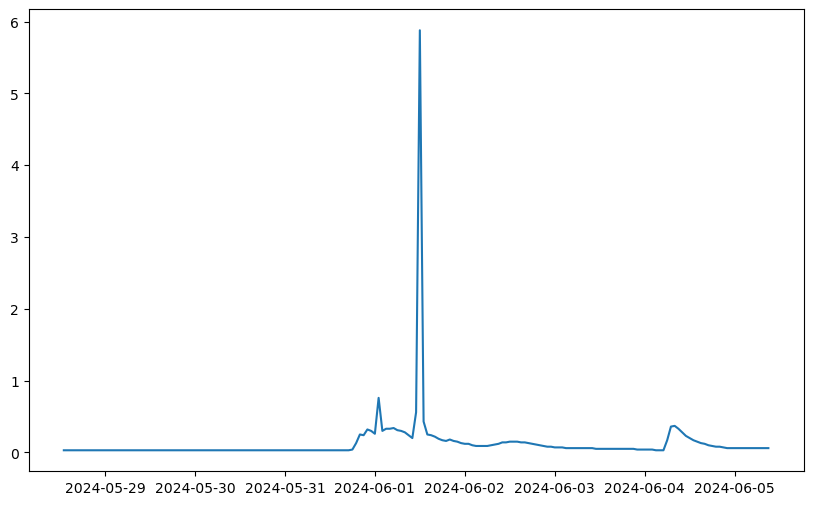

CPU times: user 10.1 s, sys: 470 ms, total: 10.6 s
Wall time: 27.8 s


In [20]:
%%time

feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_CONUS_Medium_Range**, random feature_id:

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 23481195


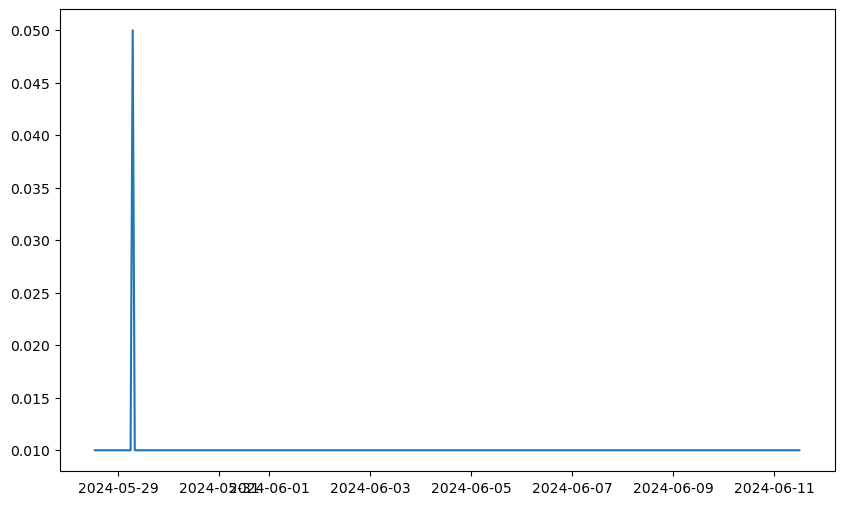

CPU times: user 16.8 s, sys: 704 ms, total: 17.5 s
Wall time: 50.6 s


In [21]:
%%time

feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])
ts_ds = ds_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_PuertoRico_Short_Range**, random feature_id:

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 800034325


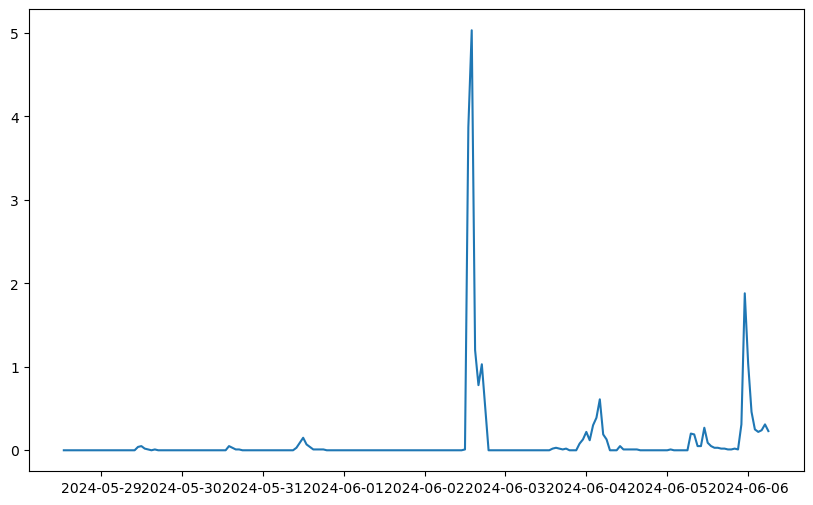

CPU times: user 695 ms, sys: 23.6 ms, total: 719 ms
Wall time: 16.1 s


In [22]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 800033398


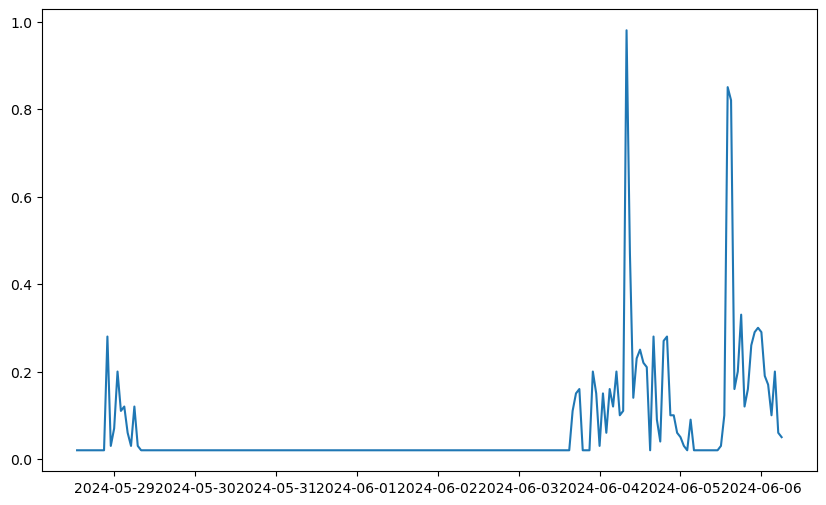

CPU times: user 684 ms, sys: 25.5 ms, total: 709 ms
Wall time: 10.9 s


In [23]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Hawaii_Short_Range**, random feature_id:

In [24]:
%%time

feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_hi_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

NameError: name 'ds_hi_sr' is not defined

**NWM_Best_Alaska_Short_Range**, random feature_id:

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 75000200011360


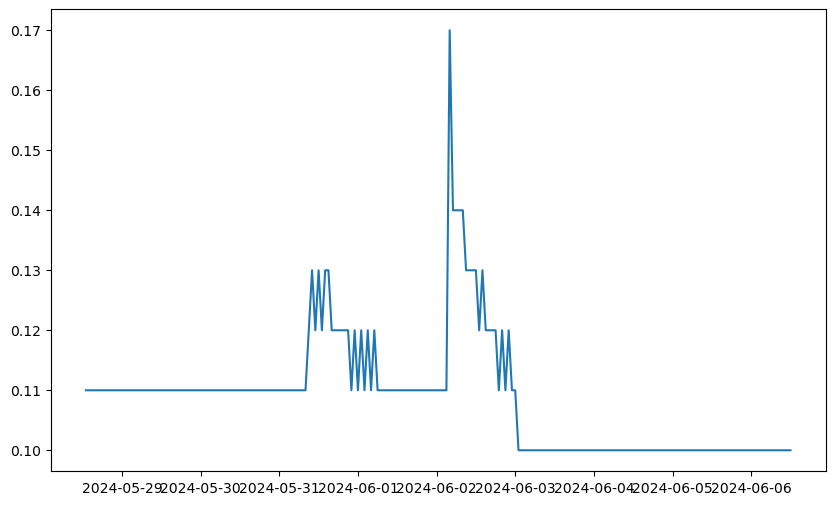

CPU times: user 2.17 s, sys: 92.2 ms, total: 2.26 s
Wall time: 22.4 s


In [25]:
%%time

feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_ak_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Alaska_Medium_Range**, random feature_id:

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 75004200006988


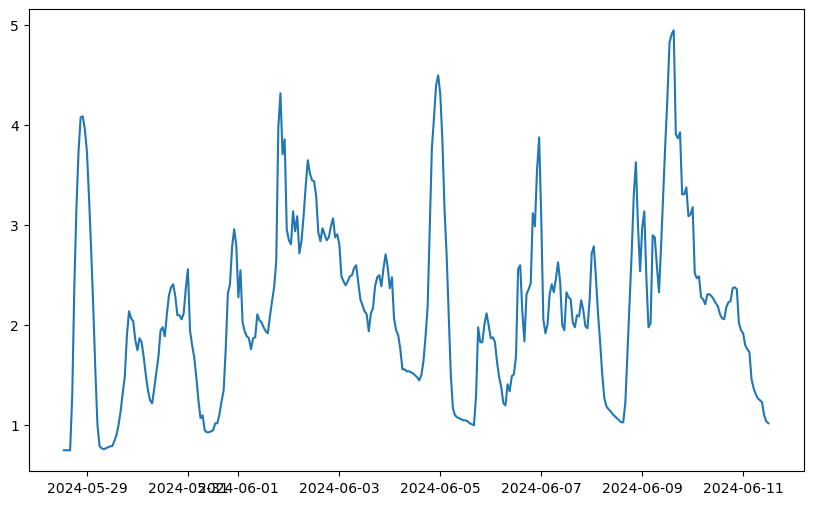

CPU times: user 3.33 s, sys: 226 ms, total: 3.55 s
Wall time: 34.4 s


In [26]:
%%time

feature_id = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'])
ts_ds = ds_ak_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

### Original Plot

This is the equivalent of the plot code in the original notebook, with a different two week time window to match the above plots

&nbsp;

**Extract and plot the timeseries data**

start_t: 2024-05-28 12:49:53.131434, end_t: 2024-06-11 12:49:53.131476, feature_id: 19020190088835


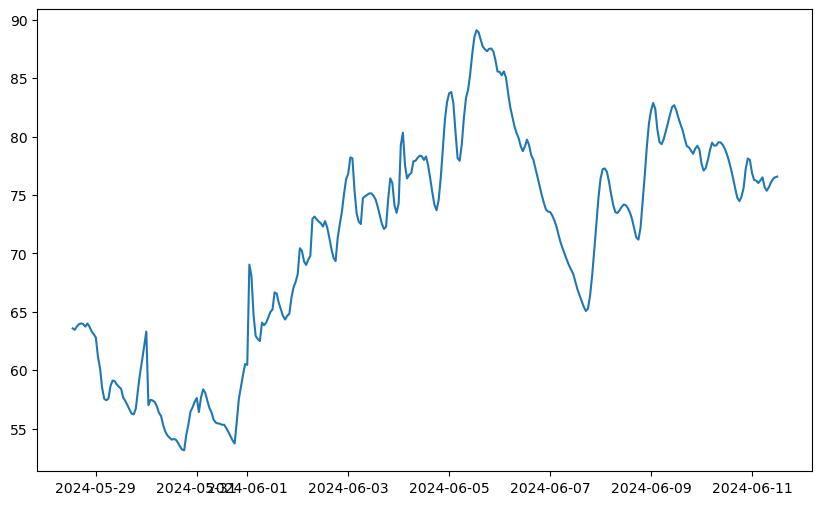

In [27]:
# use the pre-selected feature_id instead:

# this will select the first feature_id value at time slice 0:
#feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[0]

# this will select the feature_id value at index -100 at time slice 0:
feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[-100]

# this will use the hardcoded feature_id from the original notebook (sometimes errors out if not present):
feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


ts_ds = ds_ak_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

plt.show()

### Testing 

Just some testing of xarray subset functions for the above slicing/subsetting/plotting tests:

In [ ]:
# testing xarray functions............

#feature_id = 19020190088835
#start_t='2024-02-23T13:00'
#end_t = '2024-03-16T02:00'



# slice by first feature_id element:

# these functions slice by the first feature_id value, returning an xarray dataset with all times at the single feature_id index value
#feature_id = ds_mr.isel(feature_id=0)
#feature_id = ds_mr.isel(feature_id=0).coords['feature_id']

# to get the actual value of the feature_id coordinate here, we don't use array syntax, as it's a scalar:
feature_id = ds_mr.isel(feature_id=0).coords['feature_id'].values


# slice by first element of the time dimension:

# returns full xarray dataset:
#feature_id = ds_mr.isel(time=0)

# returns the feature_id coordinate xarray datarray:
#feature_id = ds_mr.isel(time=0).coords['feature_id']
feature_id = ds_mr.isel(time=0).coords['feature_id'].values

# returns the 0th feature_id coordinate value:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]



# or, just select a feature_id (doesn't actually do anything just output the same value):

#feature_id = ds_sr.sel(feature_id=19020190088835)
#feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values




# np random sample of 1000 feature_ids:
#feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

#print(feature_id_sr)
#print(feature_id)